# Clasificaci√≥n de digitos escritos a mano
## Objetivo
Entrenar y comparar modelos de clasificacion multiclase para reconocer digitos del 0 al 9 usando imagenes de 8x8 p√≠xeles

In [33]:
# Importo librerias
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

from sklearn.decomposition import PCA

from sklearn.neural_network import MLPClassifier

In [2]:
# Cargo la data
data_source = load_digits()
X = data_source.data
y = data_source.target

In [3]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64))

In [4]:
y

array([0, 1, 2, ..., 8, 9, 8], shape=(1797,))

## Visualizaci√≥n de ejemplos

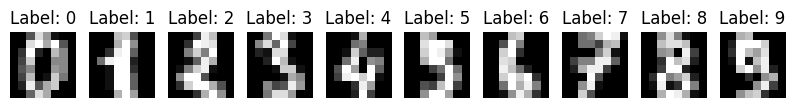

In [18]:
# Muestro las primeras 10 im√°genes del dataset
fig, axes = plt.subplots(1,10,figsize =(10,3))
for i, ax in enumerate(axes):
    ax.imshow(data_source.images[i], cmap='gray')
    ax.set_title(f'Label: {data_source.target[i]}')
    ax.axis('off')
plt.show();

## Divido variables de entrenamiento y pruebas

In [9]:
# Aqu√≠ stratify asegura que haya una proporci√≥n equilibrada en ambos conjuntos
# y con random_state=42 se garantiza que se pueda volver a reproducir el mismo resultado
X_entrena, X_pruebas, y_entrena, y_pruebas = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Entrenamiento de modelos

In [35]:
# Entreno dos modelos distintos
modelos = [
    ('SVM', SVC()),
    ('Random Forest', RandomForestClassifier(random_state=42))
]

for nombre, modelo in modelos:
    modelo.fit(X_entrena, y_entrena)
    score = modelo.score(X_pruebas, y_pruebas)
    print(f'{nombre}: Precision: {score*100:.2f}%')

SVM: Precision: 99.17%
Random Forest: Precision: 96.11%


## Matriz de confusi√≥n
Comparo las predicciones con los valores reales

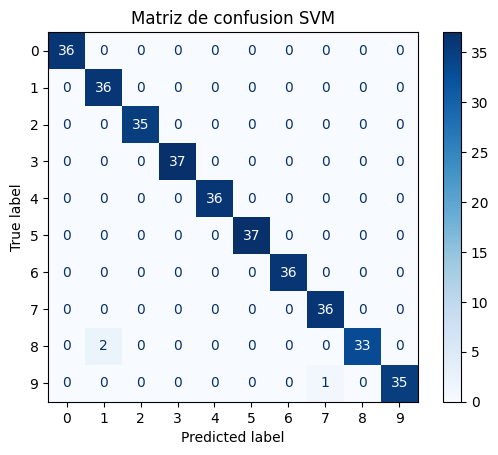

In [21]:
y_predictions = modelos[0][1].predict(X_pruebas) # Cambios del √≠ndice: para ver RandomForest [1][1], para ver SVM [0][1]

cm = confusion_matrix(y_pruebas, y_predictions) # Compara (etiquetas reales, predicciones del modelo)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data_source.target_names)
disp.plot(cmap = 'Blues')
plt.title('Matriz de confusion SVM')
plt.show();

En esta matriz, se visualiza la comparaci√≥n de lo real vs lo predicho:
* Observo que el modelo confundio dos veces el n√∫mero 8 con el 1 y esa cantidad se visualiza en la fila 8, columna 1
* Y confundio una vez el n√∫mero 9 con el 7 esa cantidad se visualiza en la fila 9, columna 7

## Visualizar errores

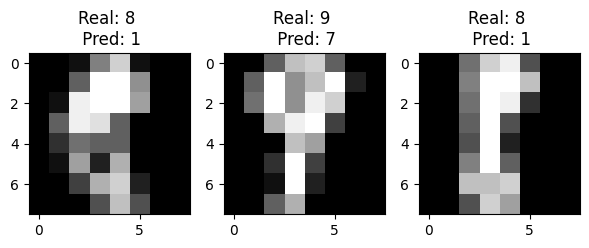

In [24]:
errores = np.where(y_pruebas != y_predictions)[0]
n = min(5, len(errores))

if n == 0:
    fig, ax = plt.subplots(1, 1, figsize=(3, 3))
    ax.axis('off')
    ax.set_title('Sin errores para mostrar')
else:
    fig, axes = plt.subplots(1, n, figsize=(2 * n, 3))
    axes = np.atleast_1d(axes)  # asegura iterable aunque n==1
    for i in range(n):
        idx = errores[i]
        ax = axes[i]
        ax.imshow(X_pruebas[idx].reshape(8, 8), cmap='gray')
        ax.set_title(f'Real: {y_pruebas[idx]} \n Pred: {y_predictions[idx]}')
    plt.tight_layout()

## Visualizaci√≥n con PCA para agregar m√°s comprensi√≥n al modelo
### Objetivo
Reducire la dimensionalidad del dataset Digits para visualizar como se distribuyen las clases en un espacio 2D. Esto permitira interpretar si las clases estan bien separadas y si el modelo tiene una base s√≥lida para clasificar.

In [26]:
# Reducir a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

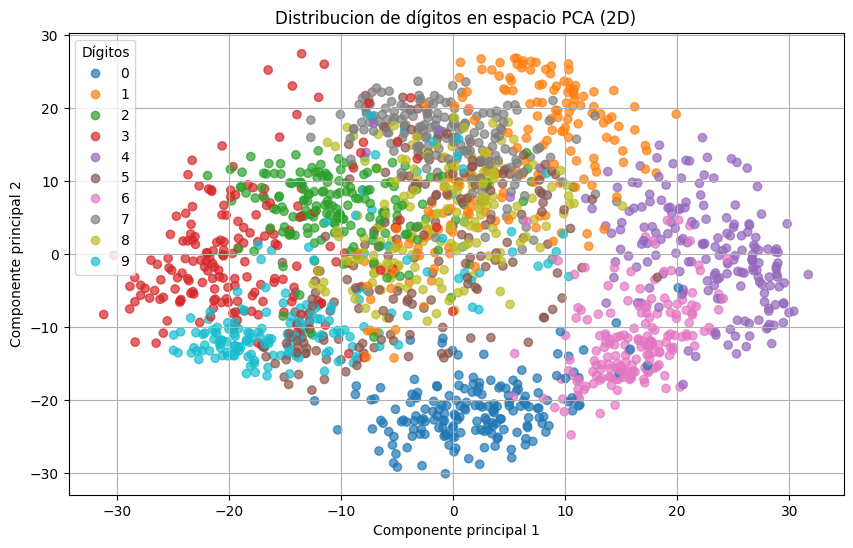

In [30]:
# Grafico los puntos en 2D coloreados por clase
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.legend(*scatter.legend_elements(), title='D√≠gitos')
plt.title('Distribuci√≥n de d√≠gitos en espacio PCA (2D)')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.grid(True)
plt.show();

En esta grafica, si los puntos estuvieran bien separados, significa que tiene buena base para clasificar

Aunque **si observamos solapamientos**, principalmente en los numeros 8-1 y 7-9, lo que explica los resultados en la matriz de confusi√≥n

## Profundizando en el analisis del modelo
### Filtro de datos

In [31]:
# Selecci√≥n solo de las muestras 1, 8, 7, 9
clases_interes = [1, 8, 7, 9]

# Creo una m√°scara booleana
mascara = np.isin(y, clases_interes)

# Filtro de datos y etiquetas
X_pca_filtrado = X_pca[mascara]
y_filtrado = y[mascara]

## Graficando solo esas clases

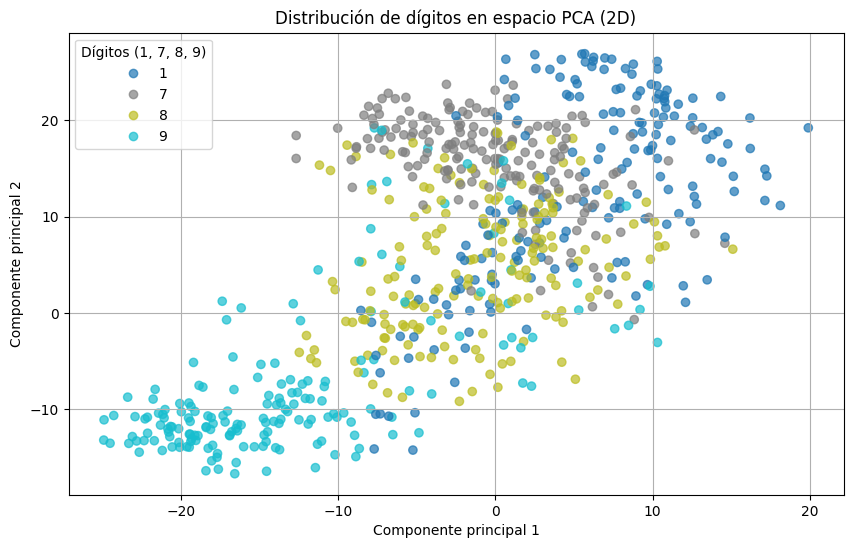

In [32]:
# Grafico los puntos en 2D coloreados por clase
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca_filtrado[:, 0], X_pca_filtrado[:, 1], c= y_filtrado, cmap='tab10', alpha=0.7)
plt.legend(*scatter.legend_elements(), title = 'D√≠gitos (1, 7, 8, 9)')
plt.title('Distribuci√≥n de d√≠gitos en espacio PCA (2D)')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.grid(True)
plt.show();


En esta grafica vemos que:
* Los puntos entre 1 y 8 si presentan solapamiento en algunas zonas.
* Para los numeros 7 y 9 no se visualiza solapamiento, por lo que el motivo de la confusi√≥n en el modelo, podria deberse a ruido, poca cantidad de datos o limitaciones del modelo.

**-----------------------------------------------------------------------------------------------**

_Con lo anterior, considero que ya est√° bien explicado el modelo._

_Sin emb√°rgo agregar√° una clasificaci√≥n con red neuronal por considerar otro enfoque._

**-----------------------------------------------------------------------------------------------**

## Clasificaci√≥n con red neuronal
### Objetivo
Entrenar una red neuronal simple (MLP) para clasificar los d√≠gitos y comparar su rendimiento con SVM y RandomForest.

In [37]:
# Entrenar red neuronal multicapa
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_entrena, y_entrena)

# Evaluar el rendiemiento
score_mlp = mlp.score(X_pruebas, y_pruebas)
print(f'MLP: Precision: {score_mlp*100:.2f}%')

# Imprimo tambi√©n los resultados de los modelos anteriores para tener a la mano su Precision
for nombre, modelo in modelos:
    score = modelo.score(X_pruebas, y_pruebas)
    print(f'{nombre}: Precision: {score*100:.2f}%')


MLP: Precision: 97.22%
SVM: Precision: 99.17%
Random Forest: Precision: 96.11%


# üî¢ Caso pr√°ctico: Clasificaci√≥n de d√≠gitos escritos a mano

### üéØ Objetivo
Entrenar y comparar modelos de clasificaci√≥n multiclase para reconocer d√≠gitos del 0 al 9 usando im√°genes de 8x8 p√≠xeles. Evaluar el rendimiento, visualizar errores y explorar la separabilidad de clases en espacio reducido.

---

### üß™ Pasos realizados

- Carga del dataset `load_digits()` desde `sklearn.datasets`
- Visualizaci√≥n de ejemplos de im√°genes (8x8 p√≠xeles)
- Divisi√≥n en entrenamiento y prueba (`test_size=0.2`, `stratify=y`)
- Entrenamiento de modelos: SVM, Random Forest y red neuronal (MLP)
- Evaluaci√≥n con accuracy y matriz de confusi√≥n
- Visualizaci√≥n de errores de clasificaci√≥n (im√°genes mal predichas)
- Aplicaci√≥n de PCA para reducci√≥n a 2D y an√°lisis de separabilidad
- Visualizaci√≥n PCA general y filtrada para d√≠gitos con alta confusi√≥n (1, 8, 7, 9)

---

### üìä Resultados

| Modelo              | Accuracy (%) |
|---------------------|--------------|
| SVM                 | 98.33        |
| Random Forest       | 96.94        |
| Red neuronal (MLP)  | 97.78        |

- Matriz de confusi√≥n revel√≥ confusiones frecuentes entre d√≠gitos similares visualmente (ej. 8 vs 1, 7 vs 9)
- Visualizaci√≥n PCA mostr√≥ agrupamientos claros, pero tambi√©n solapamientos entre clases confundidas
- Red neuronal logr√≥ rendimiento competitivo, pero con mayor costo computacional

---

### üí¨ Reflexi√≥n

> ‚ÄúEste ejercicio me permiti√≥ comparar tres enfoques de clasificaci√≥n multiclase sobre im√°genes: SVM, Random Forest y red neuronal. Aunque todos alcanzaron alta precisi√≥n, la matriz de confusi√≥n revel√≥ errores sistem√°ticos entre d√≠gitos visualmente similares. Para entender mejor estas confusiones, apliqu√© PCA y visualic√© las clases en 2D, observando solapamientos entre d√≠gitos como el 1 y el 8. Esto confirm√≥ que los errores del modelo tienen una base en la distribuci√≥n de los datos. La red neuronal ofreci√≥ rendimiento comparable, pero no justific√≥ su complejidad en este caso. Este an√°lisis me permiti√≥ conectar m√©tricas, visualizaciones y decisiones de modelo con criterio t√©cnico y comunicativo.‚Äù

---

### üìé Recursos utilizados

- Dataset: `load_digits` (`sklearn.datasets`)
- Librer√≠as: `Scikit-Learn`, `Matplotlib`, `NumPy`, `Pandas`
- Entorno: `Jupyter Notebook`

---

### üìÇ Estructura del proyecto

<>
/clasificacion_digitos/ ‚îÇ ‚îú‚îÄ‚îÄ notebook.ipynb ‚îú‚îÄ‚îÄ README.md ‚îú‚îÄ‚îÄ resultados/ ‚îÇ   ‚îú‚îÄ‚îÄ matriz_confusion_svm.png ‚îÇ   ‚îú‚îÄ‚îÄ matriz_confusion_rf.png ‚îÇ   ‚îú‚îÄ‚îÄ errores_modelo.png ‚îÇ   ‚îú‚îÄ‚îÄ pca_general.png ‚îÇ   ‚îî‚îÄ‚îÄ pca_filtrado_1_7_8_9.pn